# KNN PORTION

Average Distance using KNN Method: [0.24934108 0.22485346 0.05479996 ... 0.64763991 0.12254433 0.12930229]


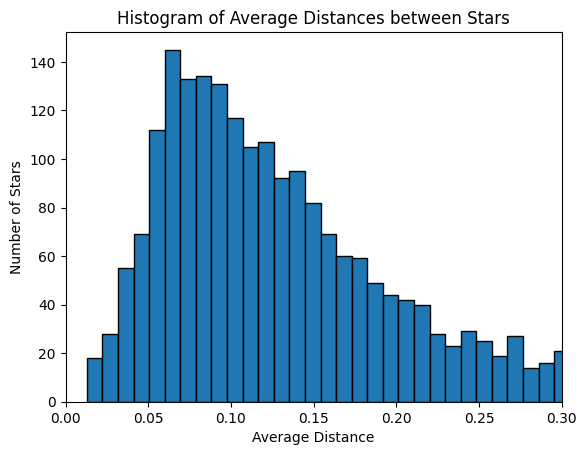

In [17]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

def calculate_average_distance(X):
    k =3
    nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(X)
    distances, indices = nbrs.kneighbors(X)
    average_distances = distances.mean(axis=1)
    return average_distances


data = pd.read_csv(r"E:\dissertation\M21\M21(4).csv")



X = data[['parallax', 'pmra', 'pmdec']].values


average_distances = calculate_average_distance(X)

print("Average Distance using KNN Method:", average_distances)


plt.hist(average_distances, bins=4000, edgecolor='black')
plt.xlabel('Average Distance')
plt.ylabel('Number of Stars')
plt.title('Histogram of Average Distances between Stars')
#plt.xlim(0,0.2)
#plt.ylim(0,250)
plt.xlim(0,0.3)
plt.show()


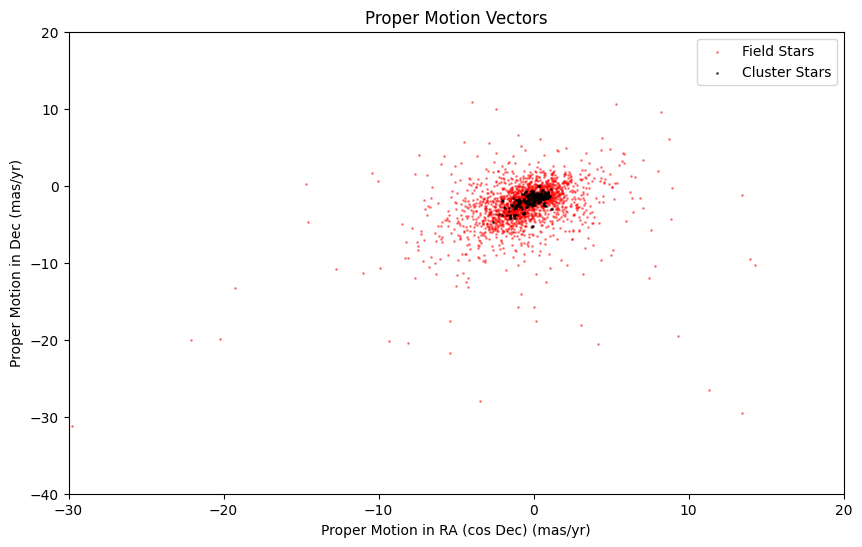

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


data = pd.read_csv(r"E:\dissertation\M21\M21(4).csv")


threshold_dNN = 0.07


def calculate_average_distances(X):
    k = 3
    nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(X)
    distances, _ = nbrs.kneighbors(X)
    return np.mean(distances, axis=1)


average_distances = calculate_average_distances(data[['parallax', 'pmra', 'pmdec']].values)


field_stars_indices = [i for i, dist in enumerate(average_distances) if dist >= threshold_dNN]
cluster_stars_indices = [i for i, dist in enumerate(average_distances) if dist < threshold_dNN]

field_stars = data.iloc[field_stars_indices]
cluster_stars = data.iloc[cluster_stars_indices]


plt.figure(figsize=(10, 6))
plt.xlabel('Proper Motion in RA (cos Dec) (mas/yr)')
plt.ylabel('Proper Motion in Dec (mas/yr)')
plt.xlim(-30, 20)
plt.ylim(-40, 20)
plt.title('Proper Motion Vectors')


plt.scatter(field_stars['pmra'], field_stars['pmdec'], color='red', s=1, alpha=0.4, label='Field Stars')


plt.scatter(cluster_stars['pmra'], cluster_stars['pmdec'], color='black', s=1, alpha=0.6, label='Cluster Stars')

plt.legend()
plt.show()


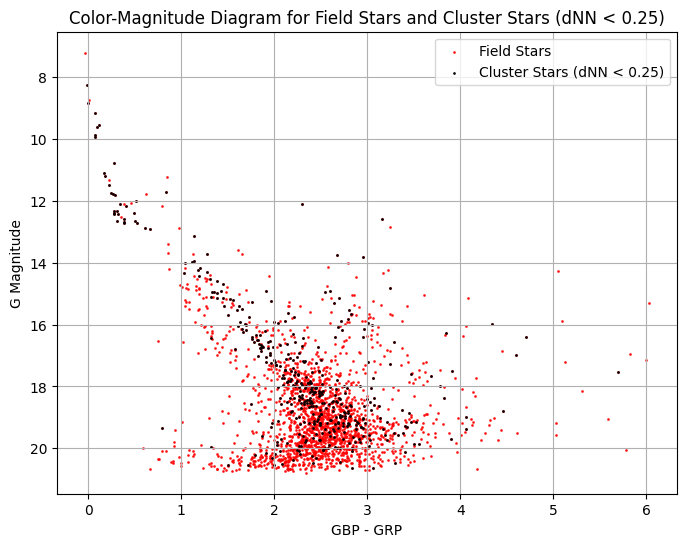

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


all_stars_data = pd.read_csv(r"E:\dissertation\M21\M21(4).csv")


k = 3
nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(all_stars_data[['parallax', 'pmra', 'pmdec']].values)


threshold_dNN = 0.07


filtered_cluster_stars_color_index = []
filtered_cluster_stars_magnitude = []


for index, star in all_stars_data.iterrows():
    
    distances, indices = nbrs.kneighbors(star[['parallax', 'pmra', 'pmdec']].values.reshape(1, -1))
    average_distance = distances.mean()
    
    if average_distance < threshold_dNN:
        filtered_cluster_stars_color_index.append(star['phot_bp_mean_mag'] - star['phot_rp_mean_mag'])
        filtered_cluster_stars_magnitude.append(star['phot_g_mean_mag'])


plt.figure(figsize=(8, 6))
plt.scatter(all_stars_data['phot_bp_mean_mag'] - all_stars_data['phot_rp_mean_mag'], 
            all_stars_data['phot_g_mean_mag'], 
            s=1, c='red', label='Field Stars', alpha=0.8)
plt.scatter(filtered_cluster_stars_color_index, filtered_cluster_stars_magnitude, 
            s=1, c='black', label='Cluster Stars (dNN < 0.25)', alpha=0.9)
plt.xlabel('GBP - GRP')
plt.ylabel('G Magnitude')
plt.title('Color-Magnitude Diagram for Field Stars and Cluster Stars (dNN < 0.25)')
plt.gca().invert_yaxis() 
plt.legend()
plt.grid(True)
plt.show()


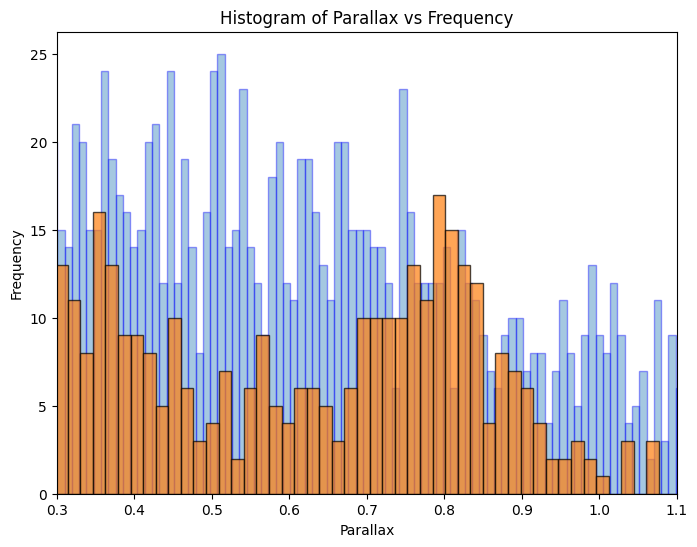

In [21]:


cutoff_distance = 0.07

all_stars_parallax = []
cluster_stars_parallax = []


for i, distance in enumerate(average_distances):
    if distance < cutoff_distance:
        cluster_stars_parallax.append(data.iloc[i]['parallax'])
    else:
        all_stars_parallax.append(data.iloc[i]['parallax'])


plt.figure(figsize=(8, 6))
plt.hist(all_stars_parallax, bins=900 , alpha=0.4, label='All Stars',edgecolor='blue')
plt.hist(cluster_stars_parallax,bins=100 ,alpha=0.7, label='Cluster Stars (𝑑NN < 0.25)',edgecolor='black')
plt.xlabel('Parallax')
plt.ylabel('Frequency')
plt.xlim(0.3,1.1)
#plt.ylim(0,300)
plt.title('Histogram of Parallax vs Frequency')
plt.show()

#print("Cluster Stars Parallax Range:", min(cluster_stars_parallax), "-", max(cluster_stars_parallax))



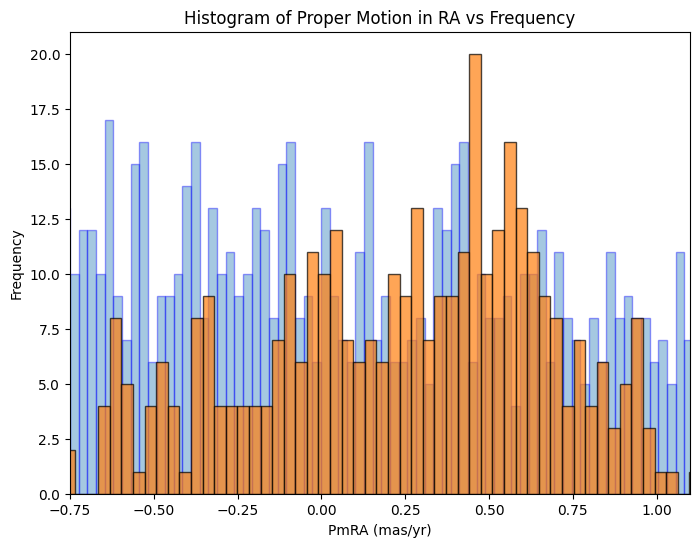

In [27]:
all_stars_pmra = []
cluster_stars_pmra= []

for i, distance in enumerate(average_distances):
    if distance < cutoff_distance:
        cluster_stars_pmra.append(data.iloc[i]['pmra'])
    else:
        all_stars_pmra.append(data.iloc[i]['pmra'])


plt.figure(figsize=(8, 6))
plt.hist(all_stars_pmra, bins=2500,  alpha=0.4, label='All Stars',edgecolor='blue')
plt.hist(cluster_stars_pmra, bins=110, alpha=0.7, label='Cluster Stars (𝑑NN < 0.04)',edgecolor='black')
plt.xlabel('PmRA (mas/yr)')
plt.ylabel('Frequency')
plt.xlim(-0.75,1.1)
#plt.ylim(0,500)
plt.title('Histogram of Proper Motion in RA vs Frequency')
plt.show()

#print("Cluster Stars PmRA Range:", min(cluster_stars_pmra), "-", max(cluster_stars_pmra))


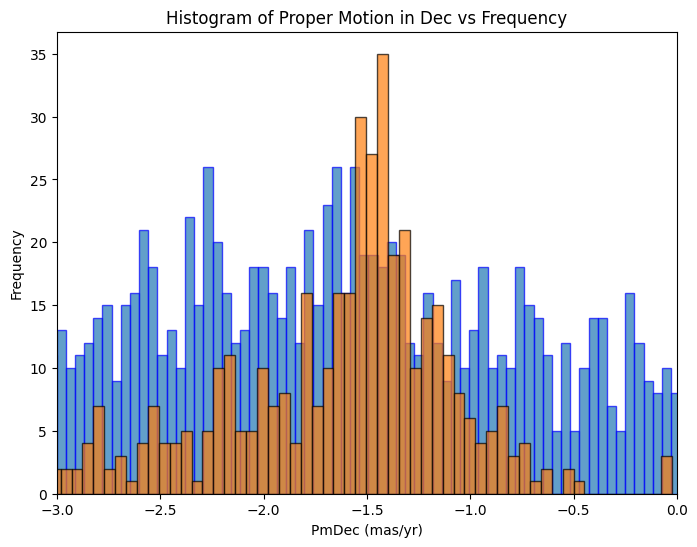

In [31]:
all_stars_pmdec = []
cluster_stars_pmdec= []

for i, distance in enumerate(average_distances):
    if distance < cutoff_distance:
        cluster_stars_pmdec.append(data.iloc[i]['pmdec'])
    else:
        all_stars_pmdec.append(data.iloc[i]['pmdec'])

# Plot the histogram of pmdec vs frequency for both all the stars and cluster stars
plt.figure(figsize=(8, 6))
plt.hist(all_stars_pmdec, bins=3000,  alpha=0.7, label='All Stars',edgecolor='blue')
plt.hist(cluster_stars_pmdec, bins=100
         ,  alpha=0.7, label='Cluster Stars (𝑑NN < 0.04)',edgecolor='black')
plt.xlabel('PmDec (mas/yr)')
plt.ylabel('Frequency')
plt.xlim(-3,0)
#plt.ylim(0,800)
plt.title('Histogram of Proper Motion in Dec vs Frequency')
plt.show()

#print("Cluster Stars PmRA Range:", min(cluster_stars_pmdec), "-", max(cluster_stars_pmdec))


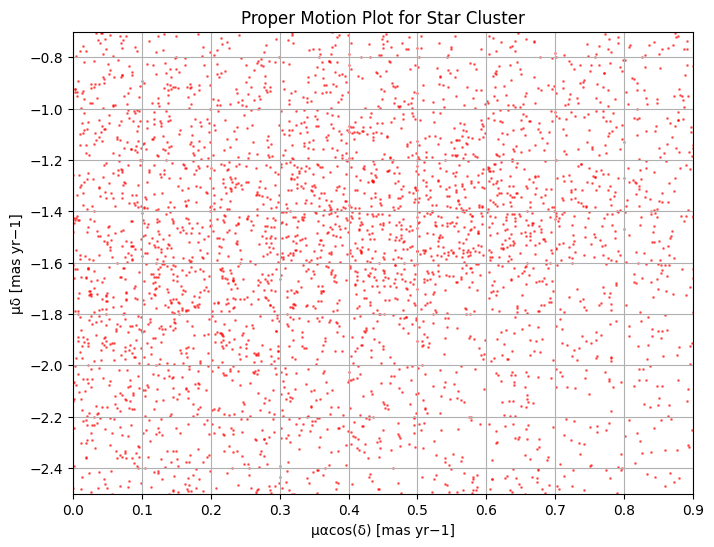

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"E:\dissertation\M21\M21(17).csv")

pmra = data['pmra']
pmdec = data['pmdec']

plt.figure(figsize=(8, 6))
plt.scatter(pmra, pmdec, s=1, alpha=0.5,color='red')
plt.xlabel('μαcos(δ) [mas yr−1]')
plt.ylabel('μδ [mas yr−1]')
plt.xlim(0,0.9)
plt.ylim(-2.5,-0.7)
plt.title('Proper Motion Plot for Star Cluster')
plt.grid(True)
plt.show()
